<a href="https://colab.research.google.com/github/revanth8607/COURSE/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/heart.csv')

In [7]:
print('shape of dataset : ', df.shape)

shape of dataset :  (303, 14)


In [10]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
df['target'].nunique()

2

In [18]:
df['target'].unique()

array([1, 0])

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

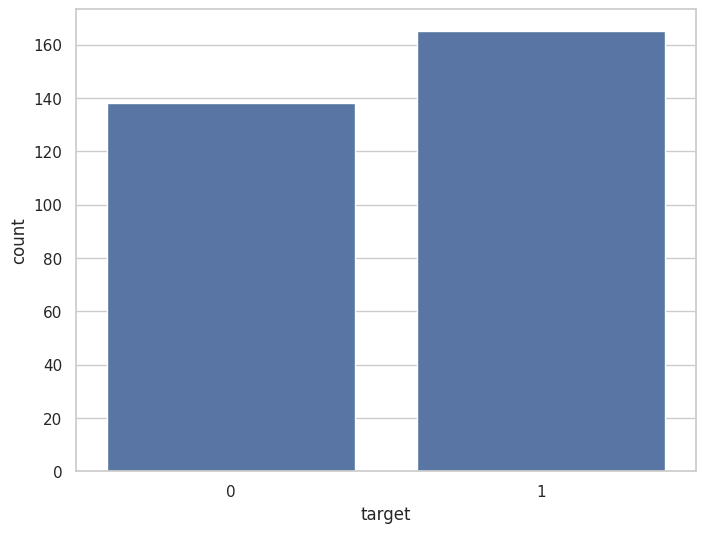

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

In [21]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

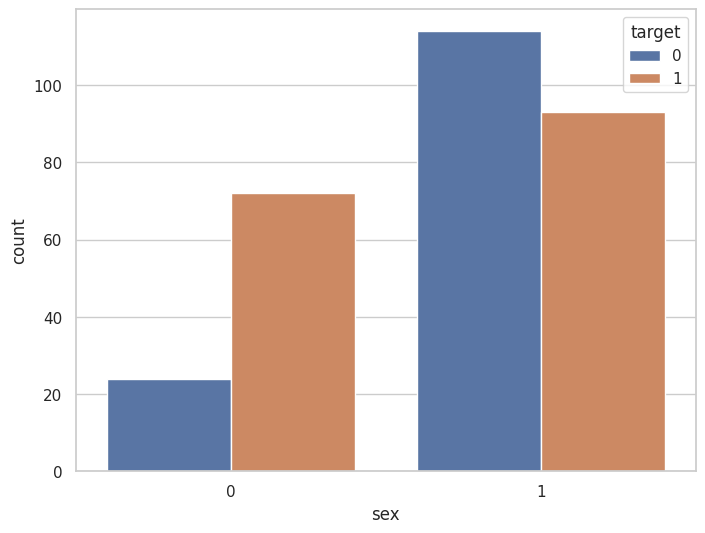

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

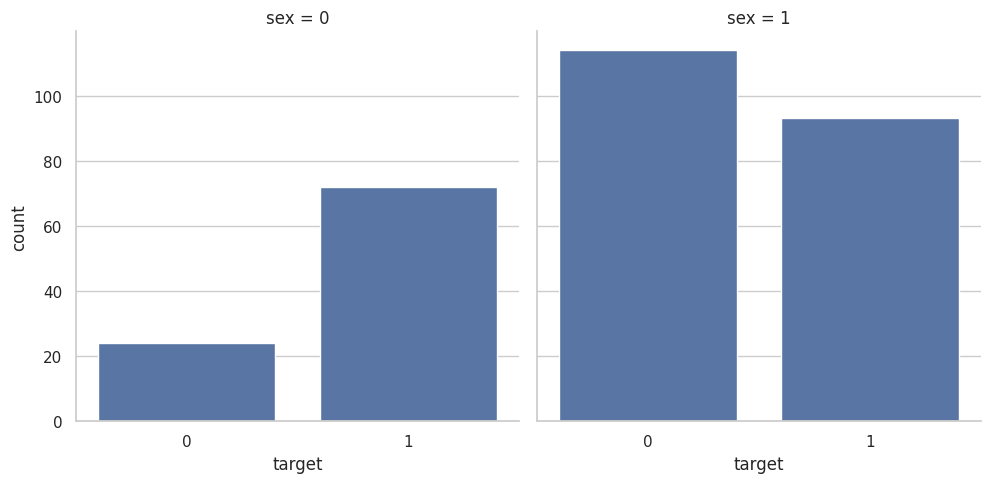

In [23]:
ax = sns.catplot(x="target", col="sex", data=df, kind="count", height=5, aspect=1)

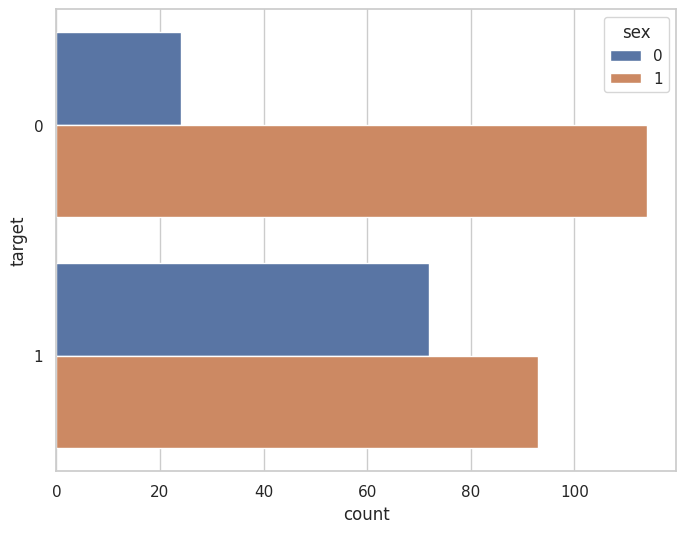

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.show()

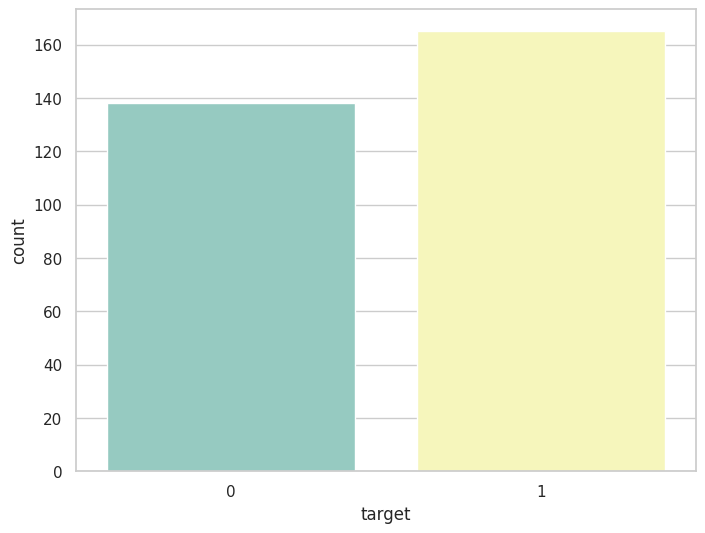

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, palette="Set3")
plt.show()

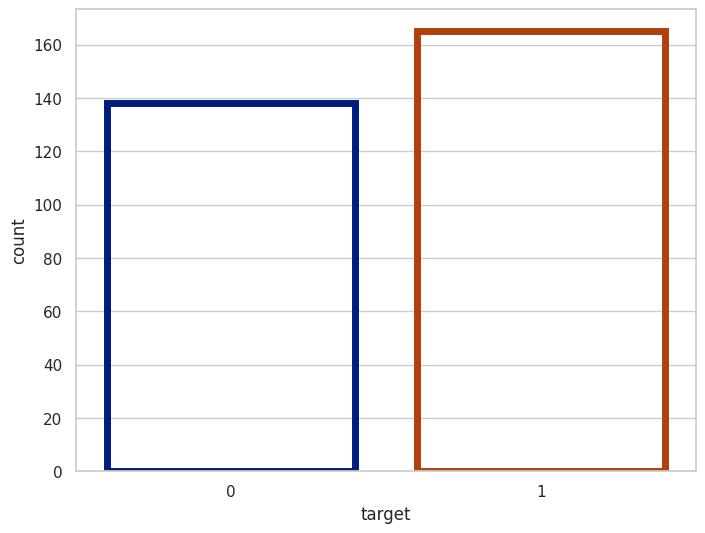

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

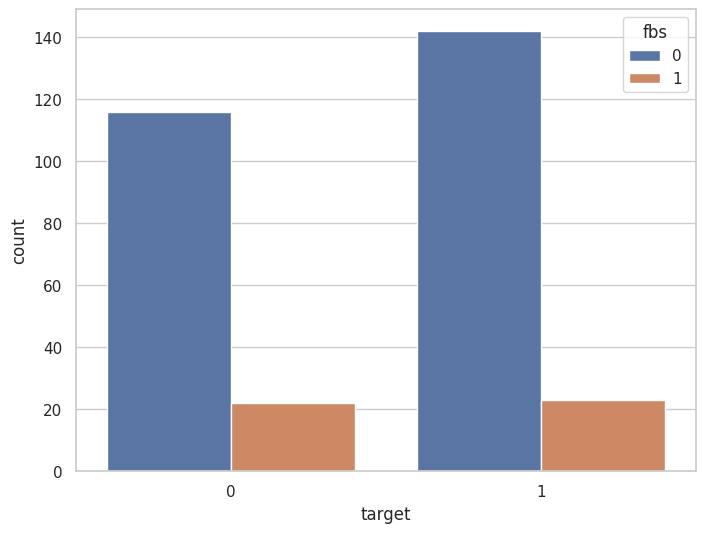

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=df)
plt.show()

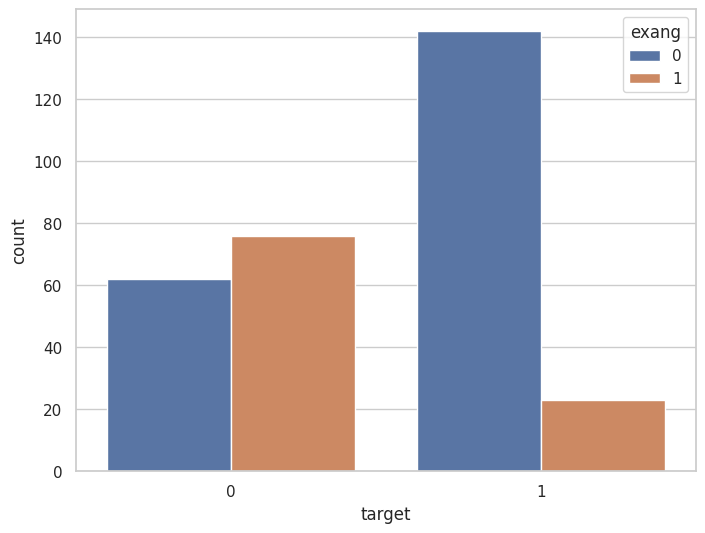

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

In [29]:
correlation = df.corr()

In [30]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [31]:
df['cp'].nunique()

4

In [32]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

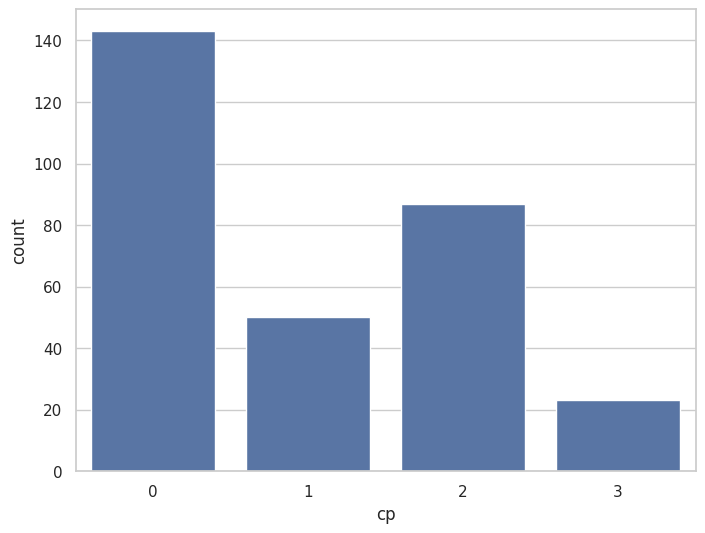

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.show()

In [34]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

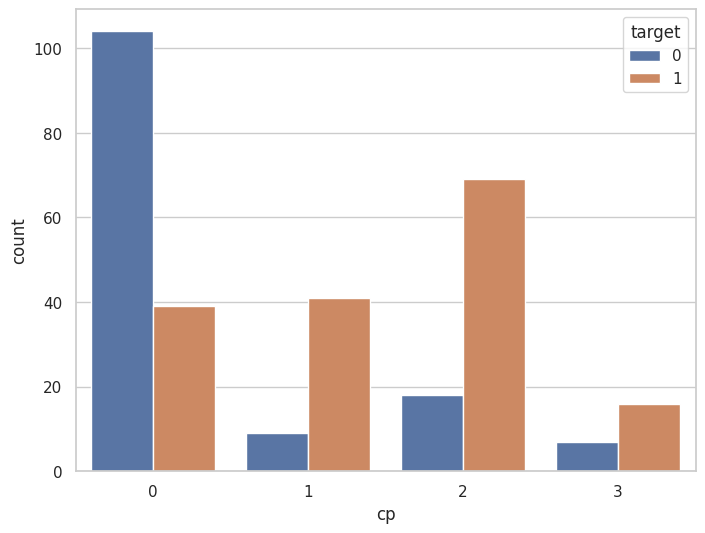

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

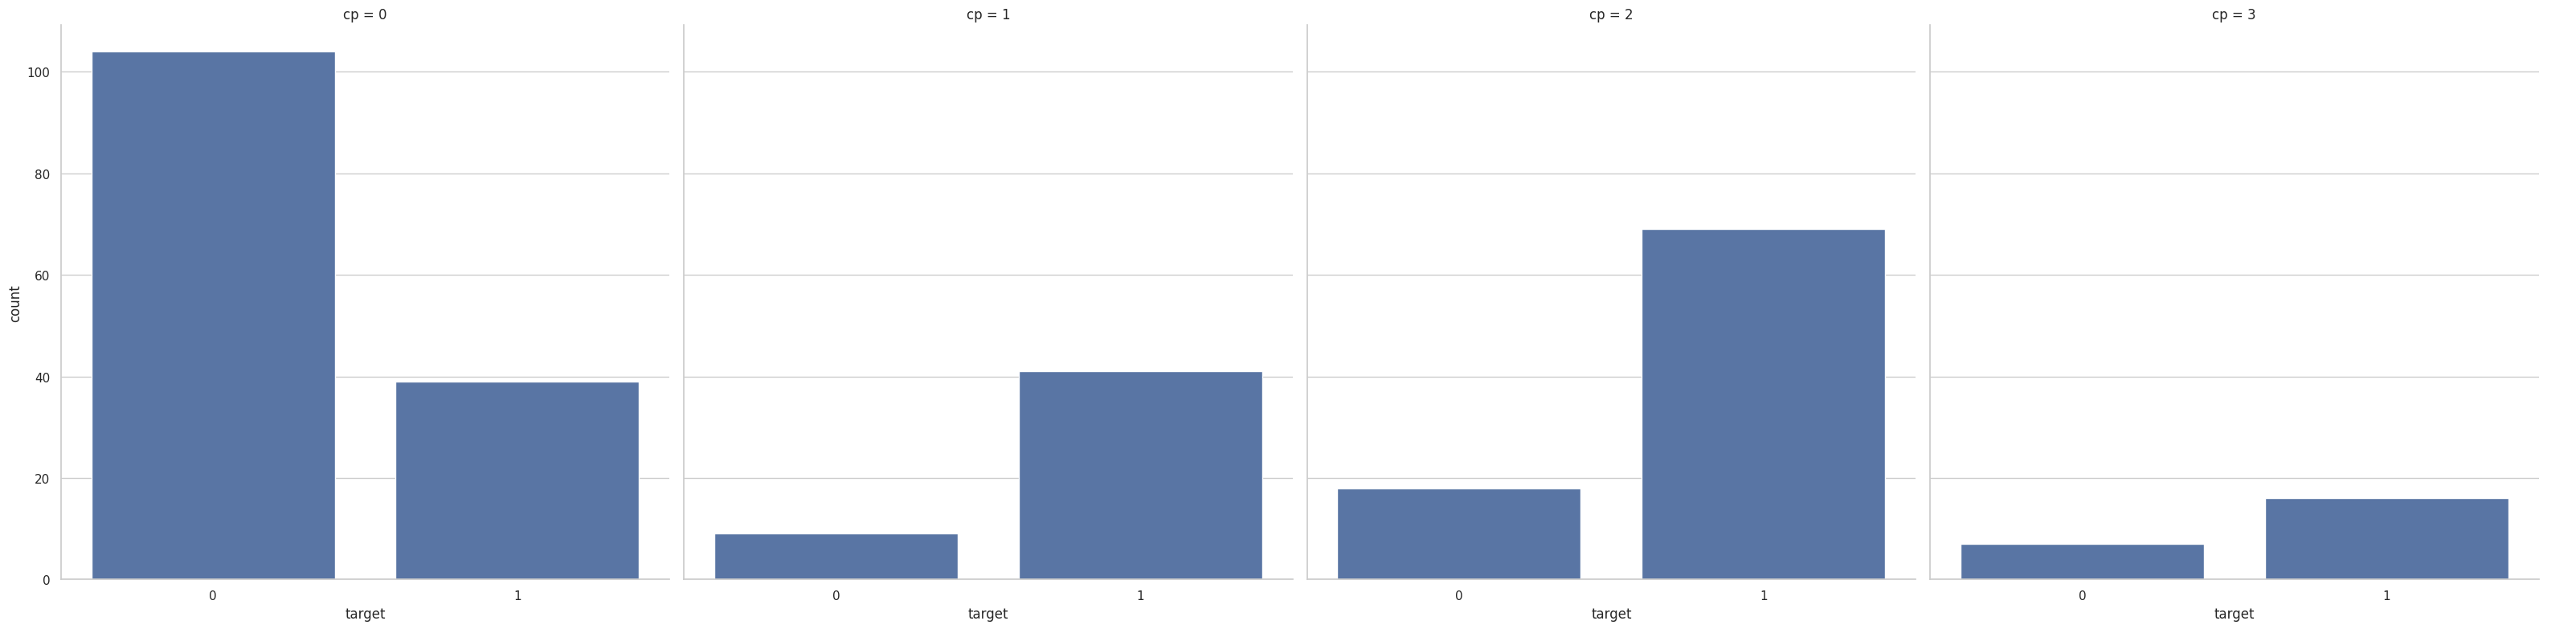

In [36]:
ax = sns.catplot(x="target", col="cp", data=df, kind="count", height=8, aspect=1)

In [37]:
df['thalach'].nunique()

91

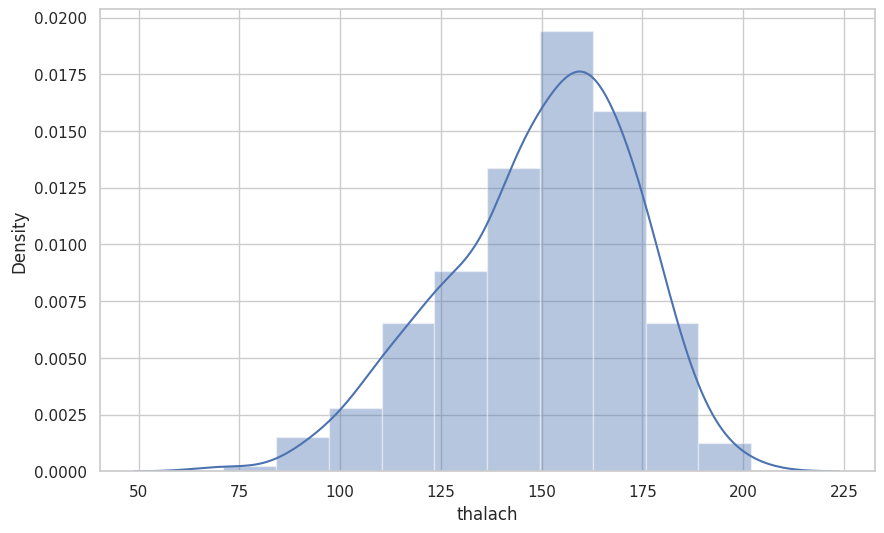

In [38]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

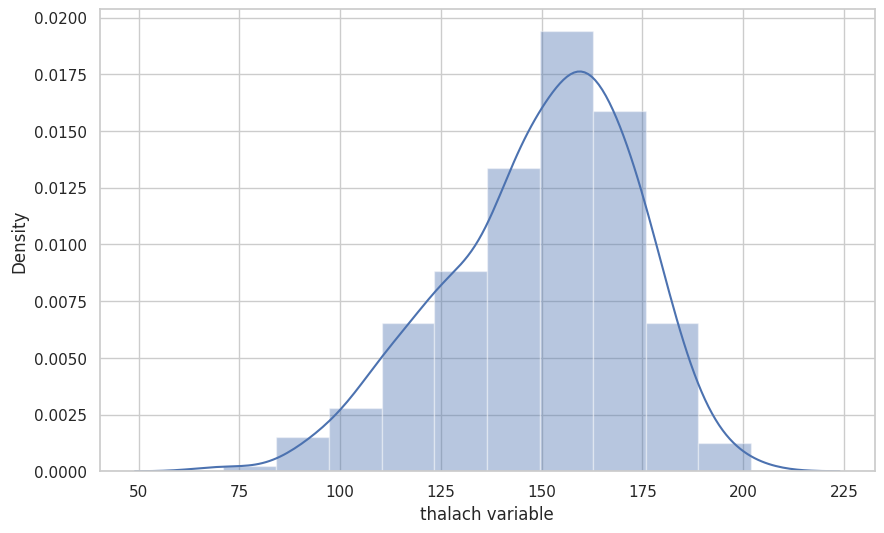

In [39]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

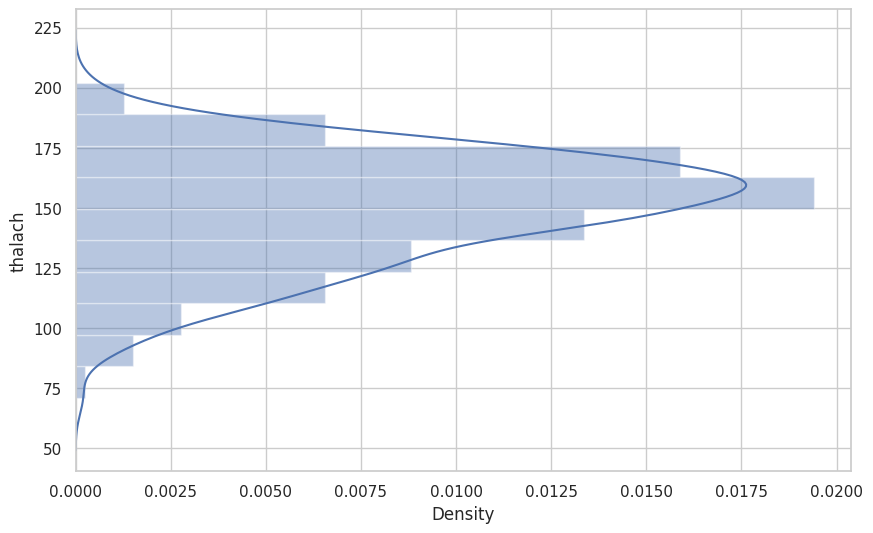

In [40]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10, vertical=True)
plt.show()

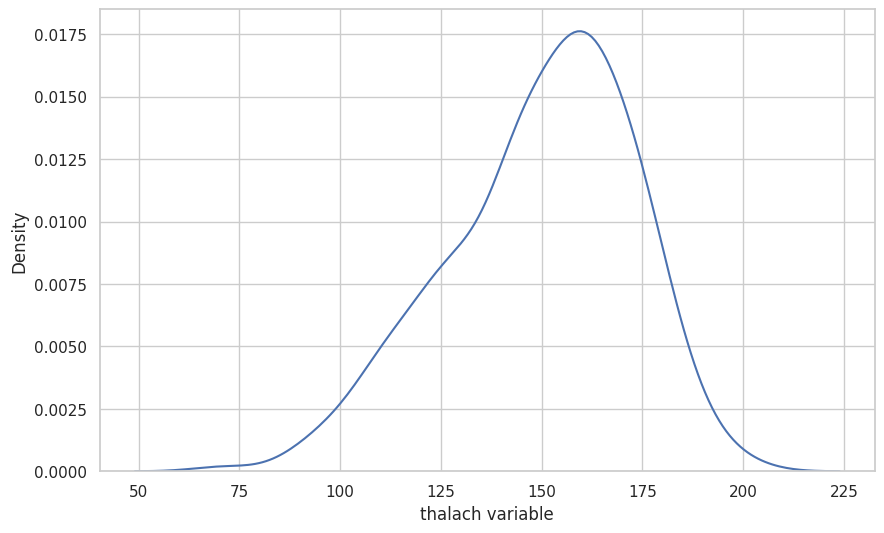

In [41]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

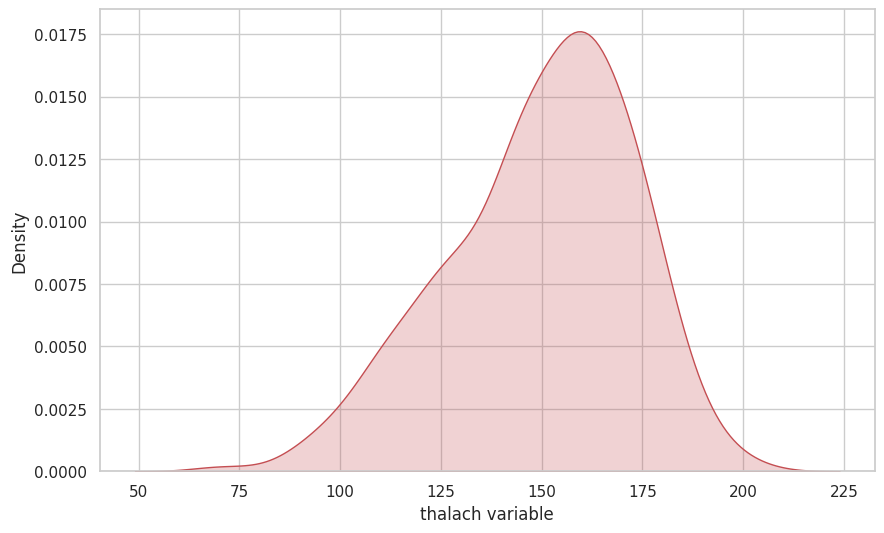

In [42]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

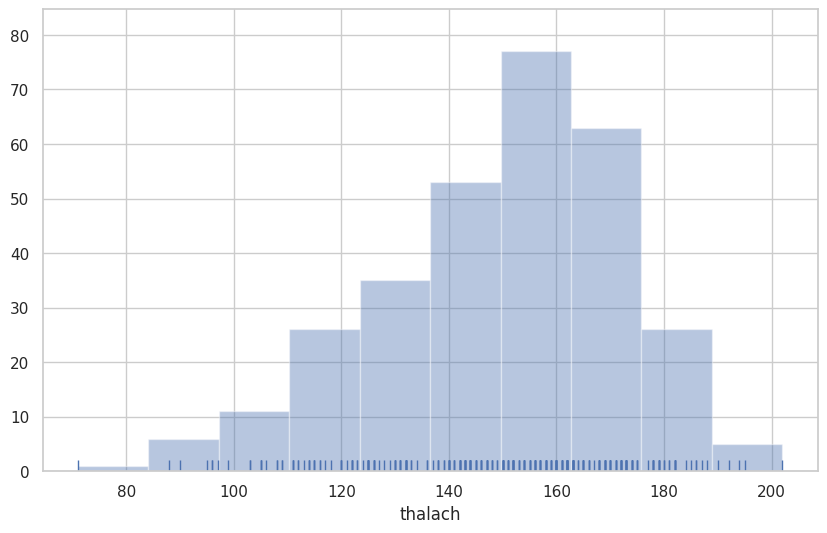

In [43]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

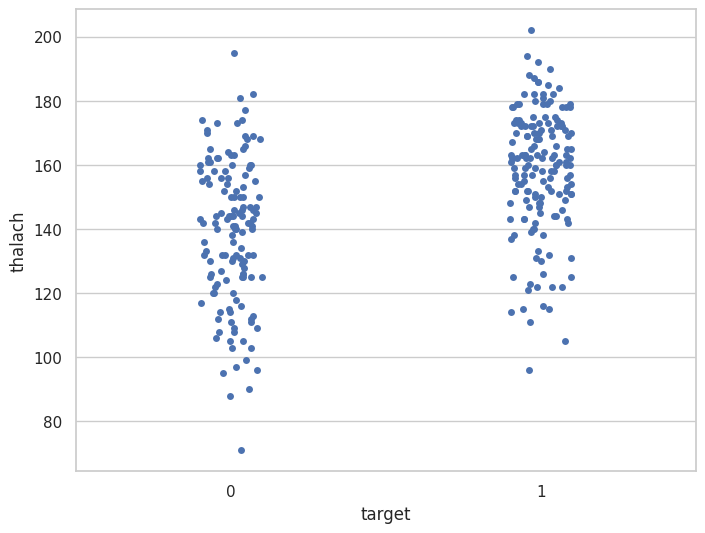

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

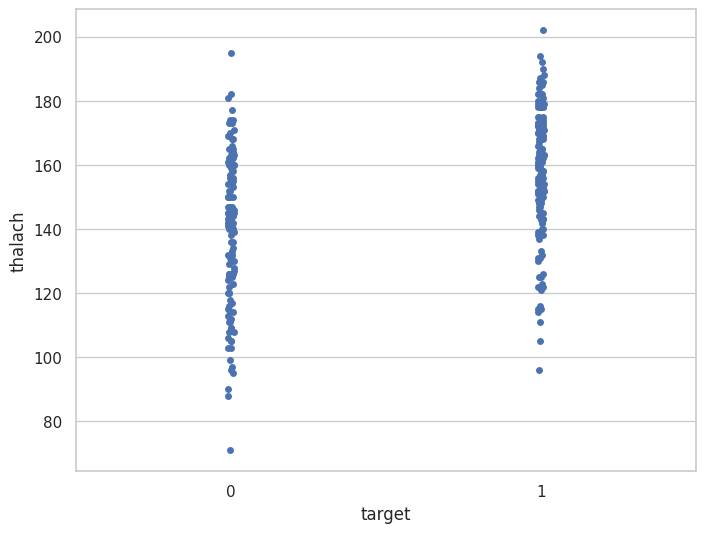

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

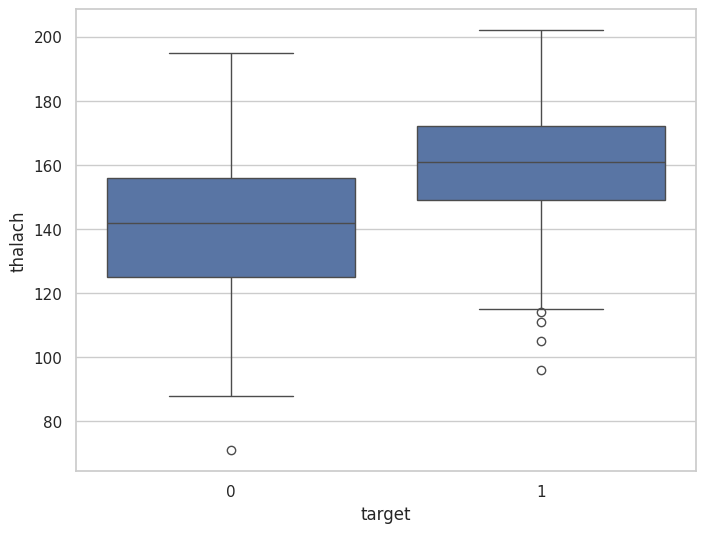

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

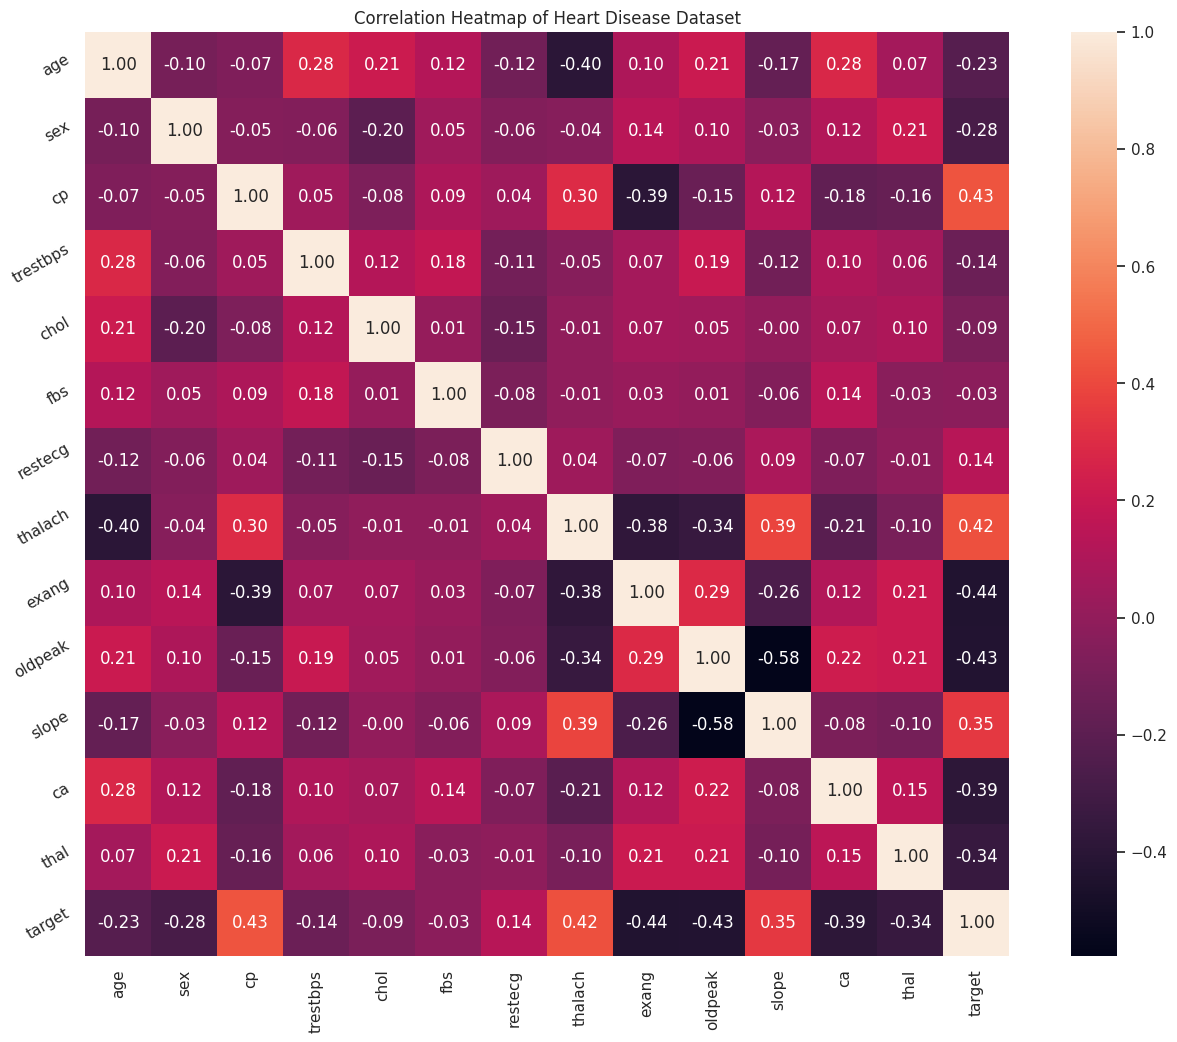

In [47]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

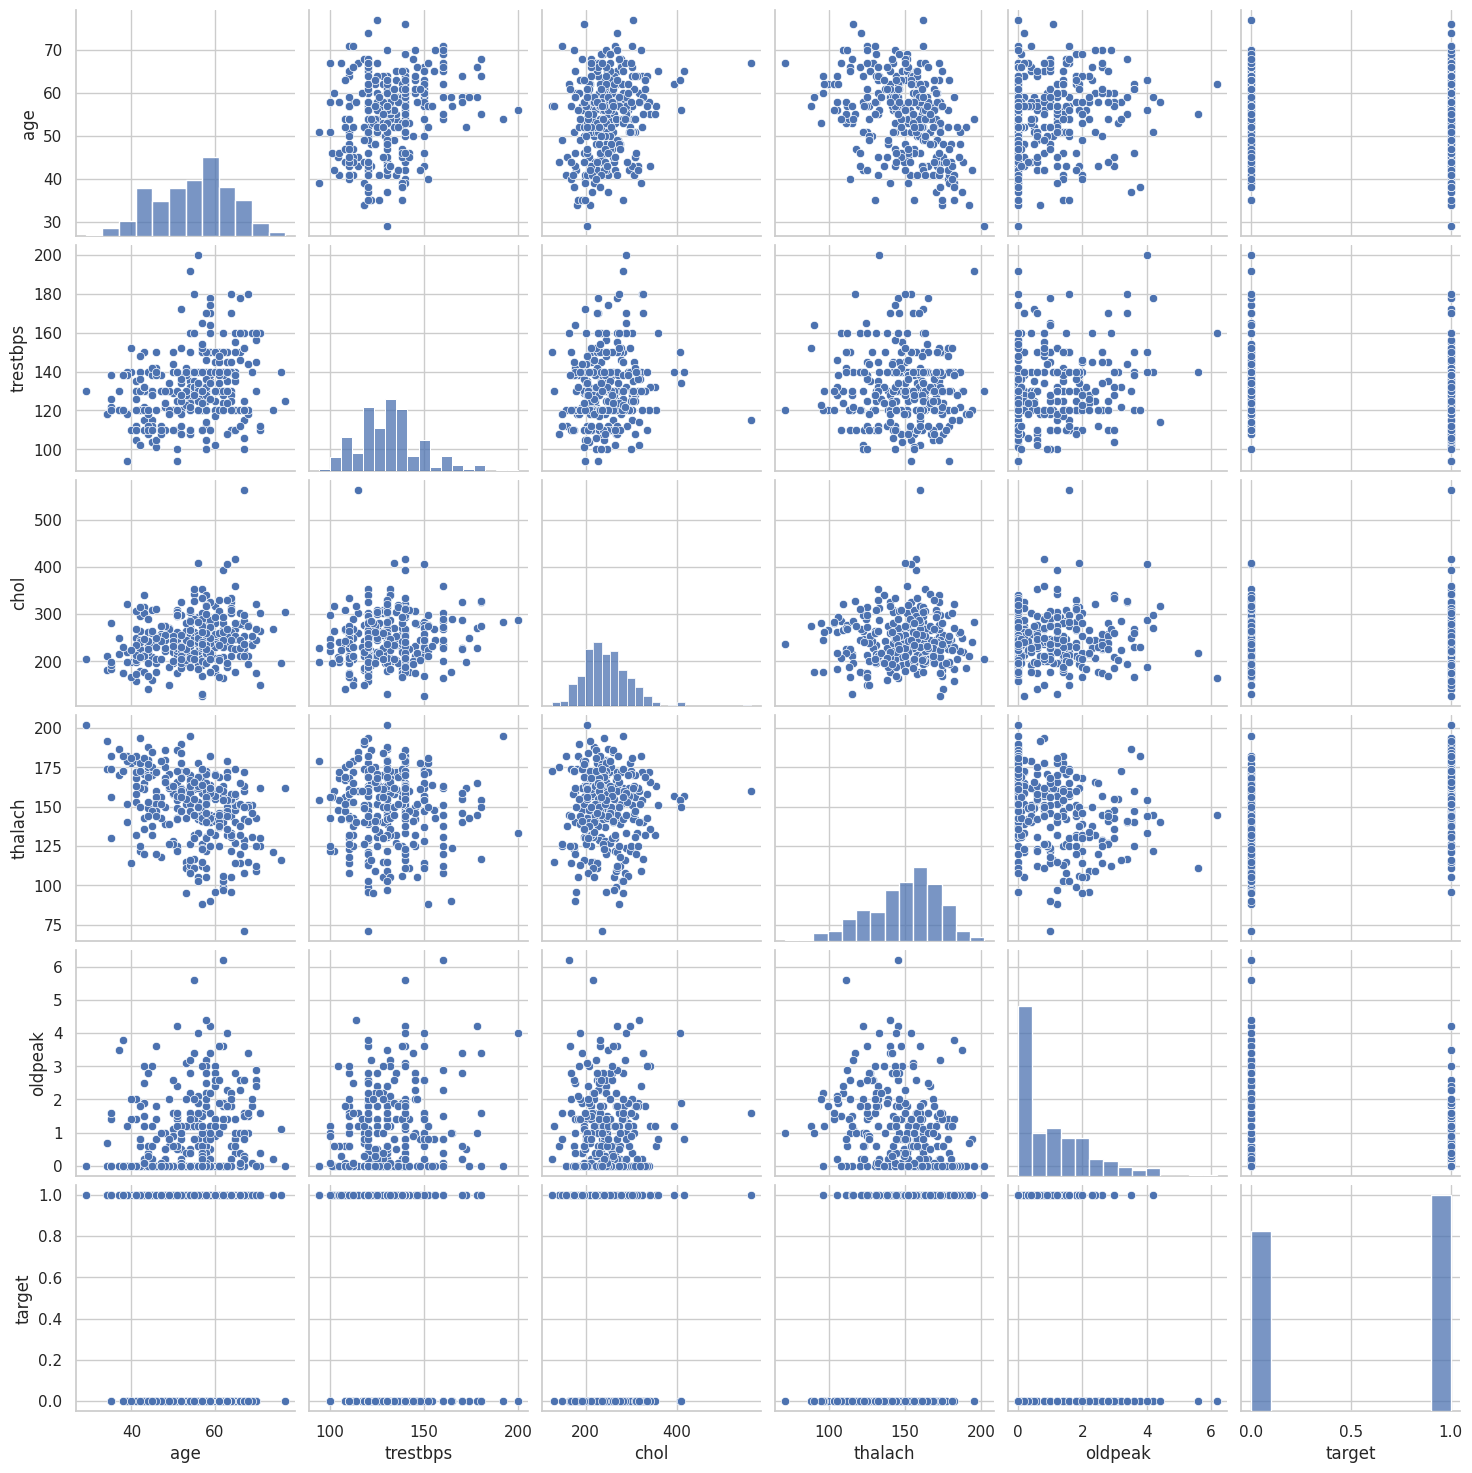

In [48]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

In [49]:
df['age'].nunique()

41

In [50]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

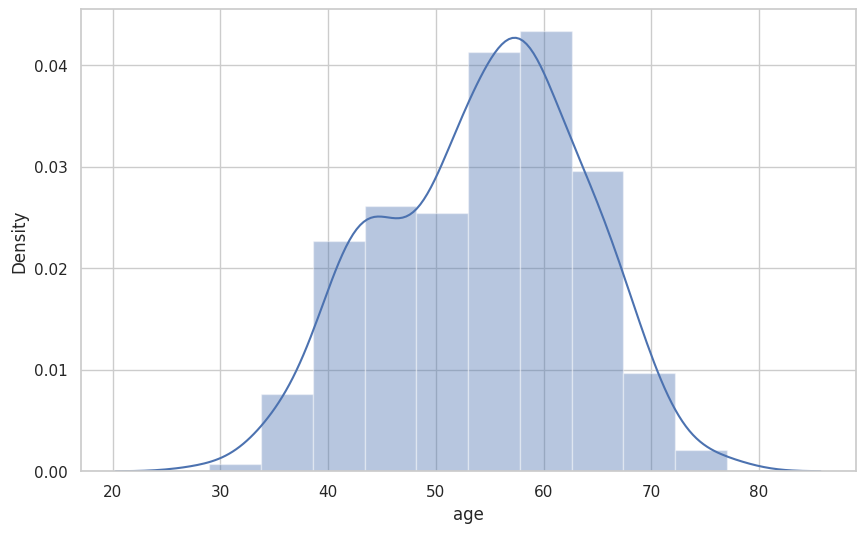

In [51]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

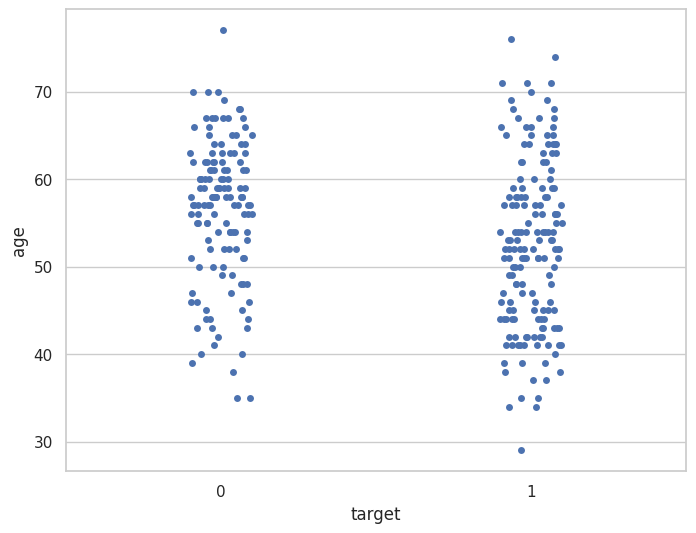

In [52]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=df)
plt.show()

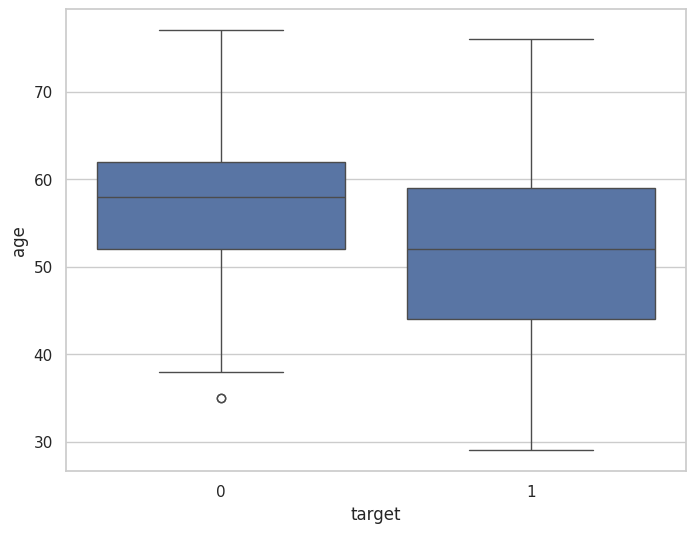

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

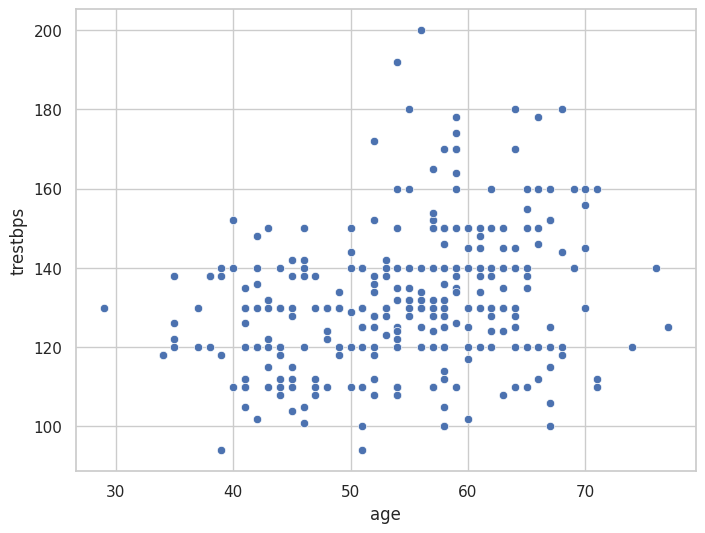

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()


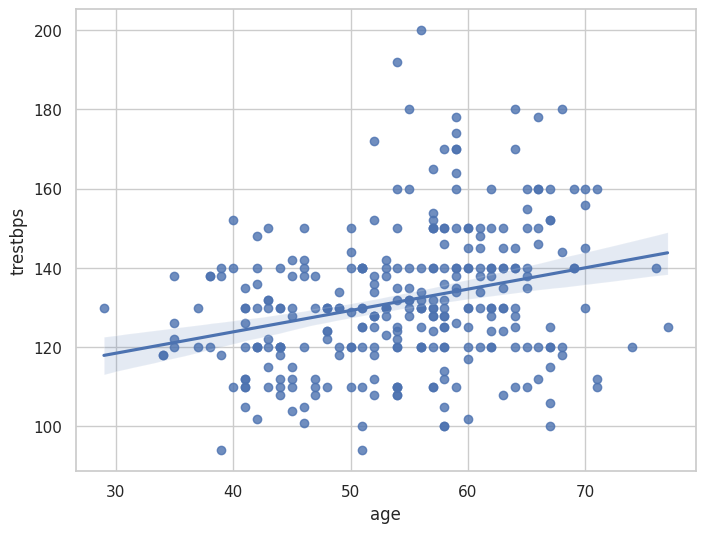

In [55]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

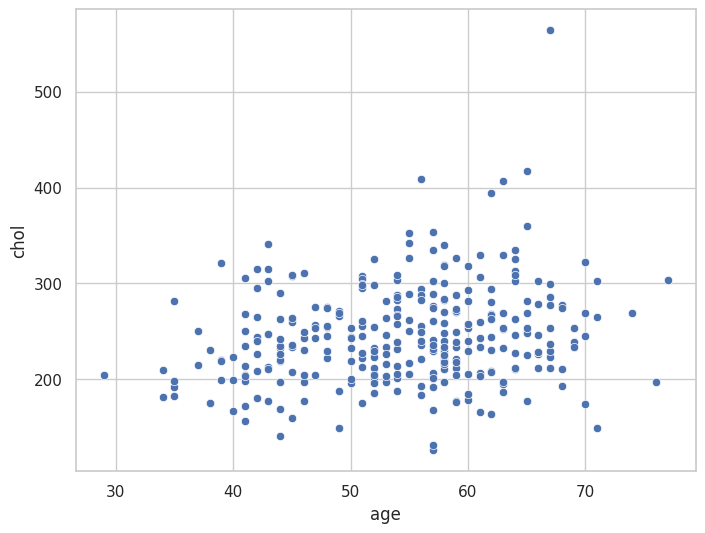

In [56]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

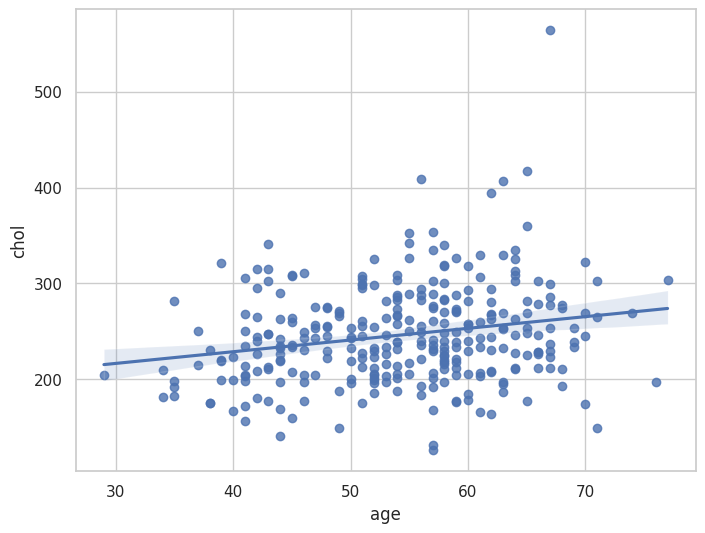

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

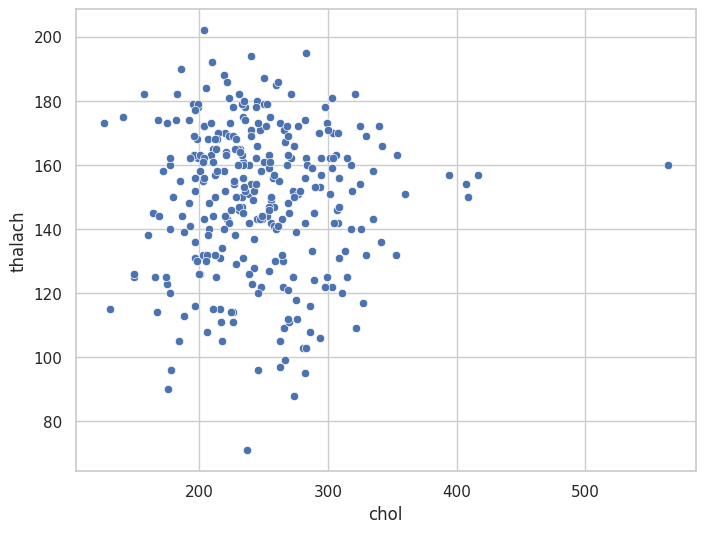

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

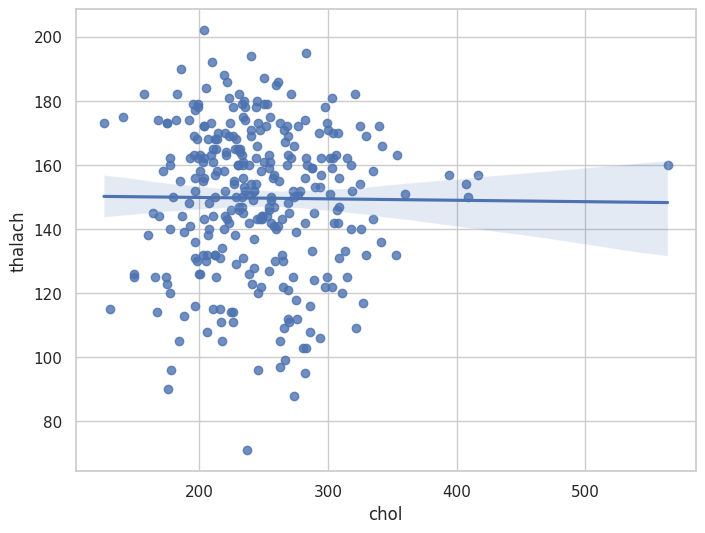

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

In [60]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [61]:
assert pd.notnull(df).all().all()

In [62]:
assert (df >= 0).all().all()

In [63]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

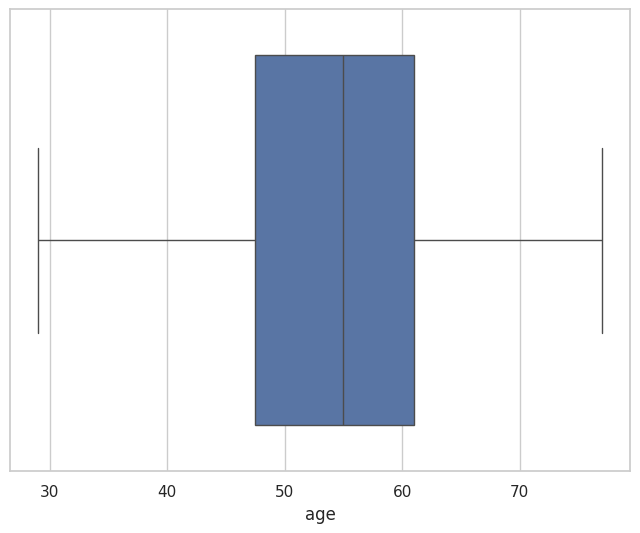

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

In [65]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

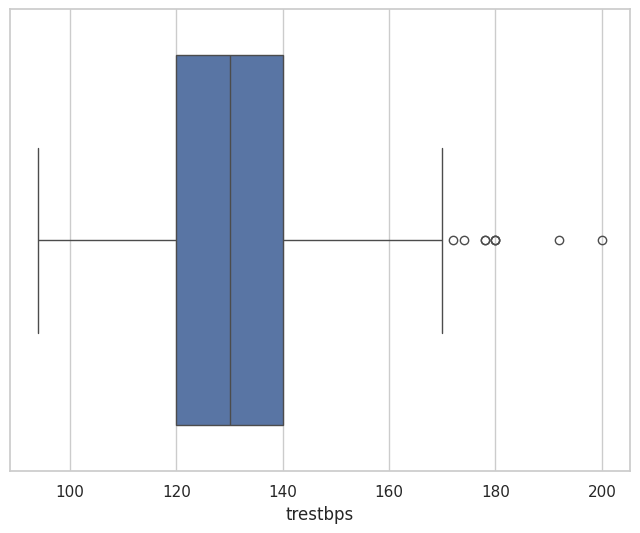

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()


In [67]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

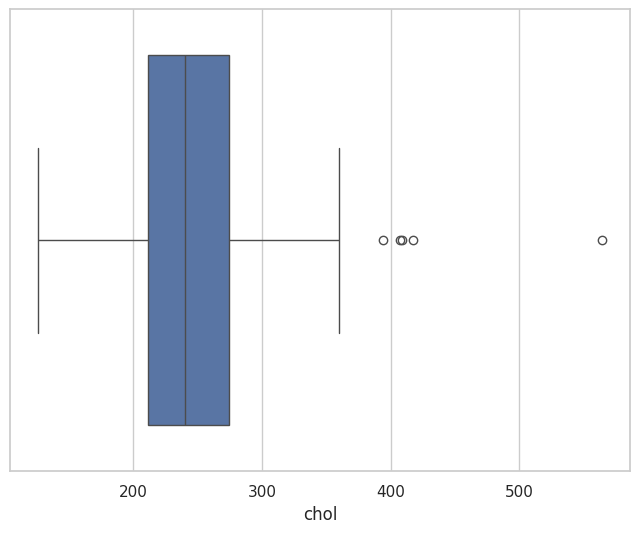

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()

In [69]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

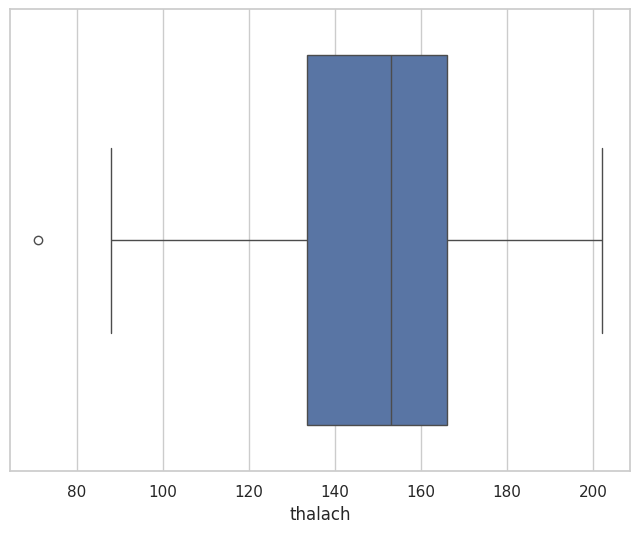

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

In [71]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

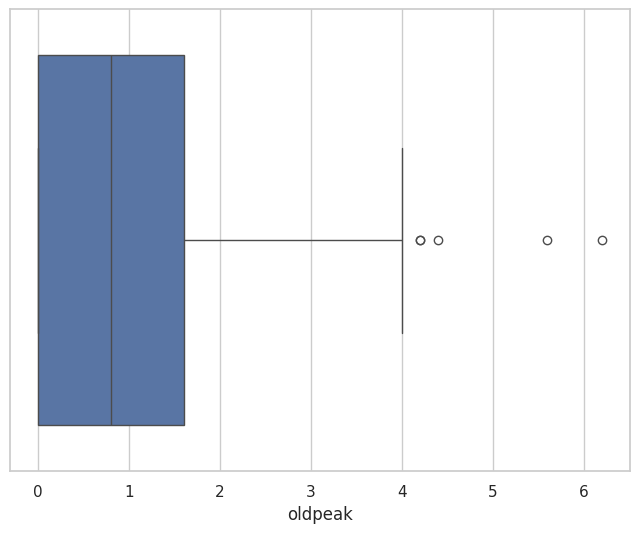

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()